In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [31]:
!pwd

/content


In [32]:
!mkdir "Data"

mkdir: cannot create directory ‘Data’: File exists


In [33]:
%cd /gdrive/MyDrive/Coswara-Data

[Errno 2] No such file or directory: '/gdrive/MyDrive/Coswara-Data'
/content


In [ ]:
!cp -r "/gdrive/.shortcut-targets-by-id/1-1n3pu4GLuD5BWgcIssWFmdBZNxdmukw/Coswara-Data" "/gdrive/MyDrive/Covid-19 Cough/Data"

cp: cannot stat '/gdrive/.shortcut-targets-by-id/1-1n3pu4GLuD5BWgcIssWFmdBZNxdmukw/Coswara-Data': Operation not permitted


In [ ]:
%cd /gdrive/MyDrive/Covid-19 Cough

/gdrive/MyDrive/Covid-19 Cough


In [ ]:
# !mkdir data

In [ ]:
%cd data

/gdrive/MyDrive/Covid-19 Cough/data


In [ ]:
# !git clone "https://github.com/iiscleap/Coswara-Data.git"

In [ ]:
%cd data/Coswara-Data/20200413

[Errno 2] No such file or directory: 'data/Coswara-Data/20200413'
/gdrive/MyDrive/Covid-19 Cough/data


In [ ]:
import os
import sys
import subprocess
import numpy as np
import glob
import json
import pandas as pd
import shutil

In [ ]:
os.chdir('/gdrive/MyDrive/Covid-19 Cough/data/Coswara-Data/20200814')

In [ ]:
!ls

20200814.csv	    20200814.tar.gz.ab	20200814.tar.gz.ad
20200814.tar.gz.aa  20200814.tar.gz.ac	20200814.tar.gz.ae


In [ ]:
!cat *.tar.gz.* |tar -xvz -C '/gdrive/MyDrive/Covid-19 Cough/data/Coswara-Data/Extracted_DATA' 

In [ ]:
os.chdir('/gdrive/MyDrive/Covid-19 Cough/data/Coswara-Data/Extracted_DATA')

In [ ]:
for dir in os.listdir():
  print(dir)

20200505
20200413
20200415
20200416
20200417
20200418
20200419
20200424
20200430
20200502
20200504
20200525
20200604
20200707
20200720
20200803
20200814


## Visualizing the Sample data of 20200413

In [ ]:
path = "20200413/vK2bLRNzllXNeyOMudnNSL5cfpG2"  # first patients sample id path

In [ ]:
files=[]
for filename in os.scandir(path):
  if filename.is_file(): 
    files +=[filename.path]
np.shape(files)

(10,)

In [ ]:
files=[]
for file in os.listdir(path):
  print(file)
  files +=[file]

cough-shallow.wav
vowel-o.wav
counting-normal.wav
vowel-e.wav
vowel-a.wav
counting-fast.wav
breathing-shallow.wav
breathing-deep.wav
metadata.json
cough-heavy.wav


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import Audio
import librosa.display
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile 
%matplotlib inline

In [ ]:
data =[]
file_new =[]
for filename in tqdm(os.listdir(path)):
  # print(filename)
  if (filename[-3:]=='wav'):
    file_new +=[filename]
    data += [librosa.load(os.path.join(path,filename) , sr = 22050)[0]]

100%|██████████| 10/10 [00:02<00:00,  3.43it/s]


In [ ]:
print(f"shape of data:{np.shape(data)}\ndata of {file_new[0]} :{data[0]}")


shape of data:(9,)
data of cough-shallow.wav :[0.         0.         0.         ... 0.00018921 0.0002153  0.        ]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
data[0]

array([0.        , 0.        , 0.        , ..., 0.00018921, 0.0002153 ,
       0.        ], dtype=float32)

In [ ]:
df= pd.DataFrame( columns=["filename",'samples'])
df['samples']=data
df["filename"]=file_new
df.head()

,filename,samples
0,cough-shallow.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,vowel-o.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,counting-normal.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,vowel-e.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,vowel-a.wav,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
samples = df.samples.loc[0]
f = df.filename.loc[0]

Text(0.5, 1.0, 'Raw_wave')

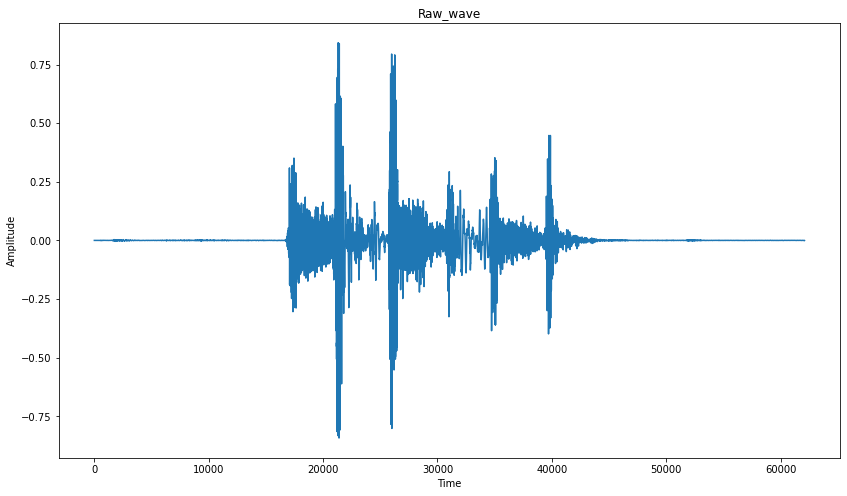

In [ ]:
fig = plt.figure(figsize=(14, 8))
plt.plot(samples)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Raw_wave")

In [ ]:
print(f"filename is {f}\nsample shape in the file:{samples.shape}")  

filename is cough-shallow.wav
sample shape in the file:(62093,)


In [ ]:
print(f"durattion of 1 sample:{1/22050 : 0.9f} seconds \
\nDuration of entire signal {f} is {len(samples)/22050 : 0.2f} seconds") #  default sampling rate of librosa :22050


durattion of 1 sample: 0.000045351 seconds 
Duration of entire signal cough-shallow.wav is  2.82 seconds


In [ ]:
Audio(os.path.join(path,'cough-shallow.wav'))

spectrogram of audio

In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

Text(0.5, 0, 'Seconds')

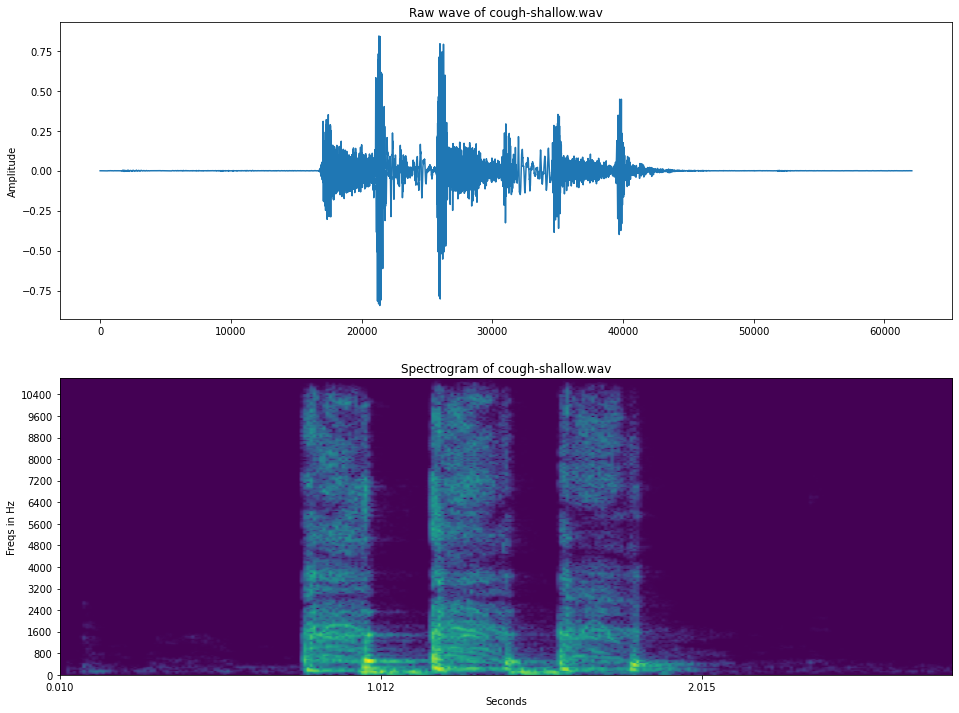

In [ ]:
sample_rate=22050 # default for librosa
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + f)
ax1.set_ylabel('Amplitude')
ax1.plot(samples )

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::100])
ax2.set_title('Spectrogram of ' + f)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

Mel spectrogram

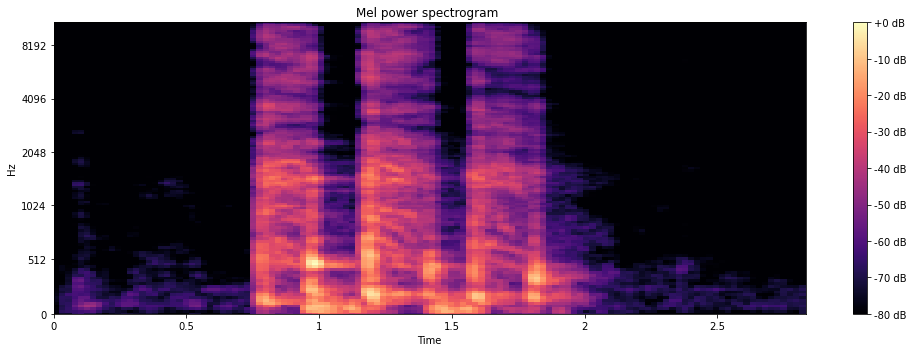

In [ ]:
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(14,5))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

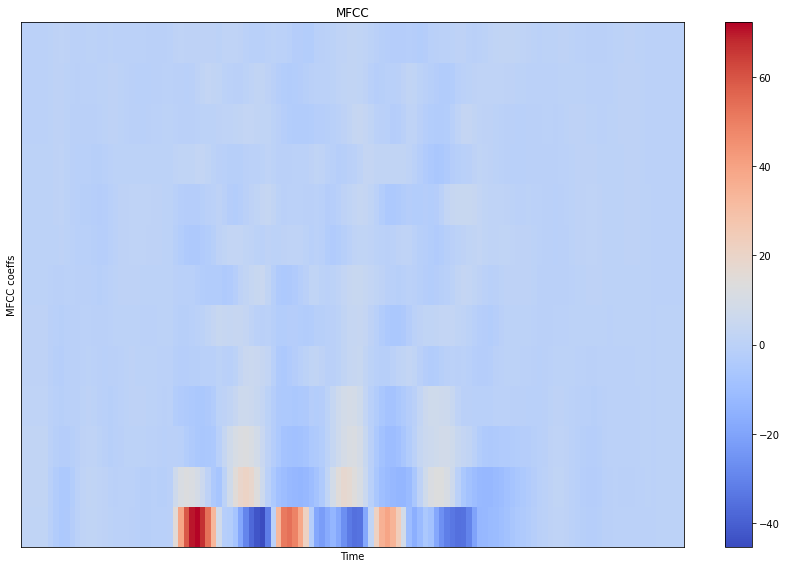

In [ ]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=1)

plt.figure(figsize=(12, 8))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

FFT

In [ ]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

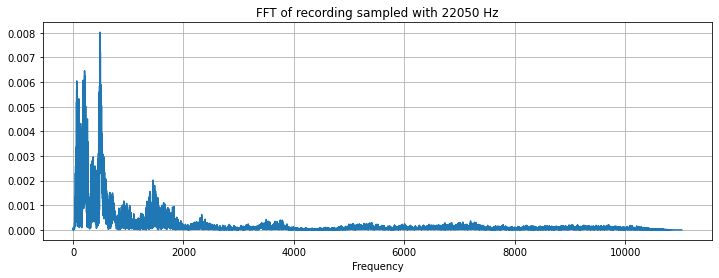

In [ ]:
xf, vals = custom_fft(samples, sample_rate)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + str(sample_rate) + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()